# Problem 2

1. Let ε_1 ε_2 ∼ N (0, s^2 · I_n ). 
1. Use a computer to investigate E[d(x + ε_1 , y + ε_2 )] for various choices of x, y ∈ R n as a function of s^2 and n. 

(You’re also welcome to dive in analytically if you like!) 

### Discussion Questions
1. What do you observe for large values of n and fixed values of s? 
1. I claim that there’s is a ”stable” choice for s in terms of n suggested by Exercise 1. 
1. What is it? 
1. If you make that choice for s, what happens for large values of n? 
1. What’s potentially disconcerting about this, if you live in R^n for n >> 0?

### Imports and Global Constants

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from importlib import reload

np.set_printoptions(precision=3)

N_SAMPLES=100

### Import Utility Module

In [2]:
import sci_kit_learn_utils.utils as scu
reload(scu)

<module 'sci_kit_learn_utils.utils' from '/home/digital-tenebrist/ms-data-science/math-637/udel-math-637/utils/sci_kit_learn_utils/utils.py'>

### Calculate Distance - store as tuple(dimension,variance,distance)

In [3]:
#  Look at dimensions between 2 and 10
dimension=list(range(2,11))
deviation_list=np.linspace(0,2,num=21,endpoint=True)[1:]
list_of_tuples=list()

#  Container for all the dimensions
dim_d=dict()

for d in dimension:
    # Draw (x,y) pairs from N(0,1) do this for 10 pairs
    for p in range(1,11):
        x=scu.draw_normal_sample(d,1)
        y=scu.draw_normal_sample(d,1)
        # Draw errors from N(0, s^2 * I_n) -> use deviation_list
        for s in deviation_list:
            d_list=list()
            for n in range(N_SAMPLES):
                err_x=scu.draw_normal_sample(d,s)
                err_y=scu.draw_normal_sample(d,s)
                x+=err_x
                y+=err_y
                d_list.append(scu.dist_between_pts(x,y))
            dist=abs(np.sum(d_list)/float(N_SAMPLES))
            del d_list
            list_of_tuples.append((d,float(f'{s**2:0.3f}'),float(f'{dist:0.3f}')))

### Convert List of tuples to Pandas DataFrame

In [4]:
df = pd.DataFrame(list_of_tuples, columns =['dimension', 'variance', 'distance'])

### Discussion

1. Takes about 1 hour to run 10*10*20*10000=20,000,000 iterations
1. Reducing N_SAMPLES to 100, should cut run time down by factor of 100
1. Use logic from problem_1 to make plots of dimension vs mean_distance.
1. From problem_1 best choice is $$\sqrt(dim)$$
1. Look at one dimension in single plot.

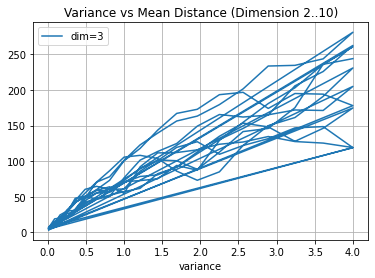

In [9]:
first=True
dim_axes=None
dim_df=None

params={
    'title': 'Variance vs Mean Distance (Dimension 2..10)',
    'grid':True
}

d=3
dim_df=df.loc[df['dimension'] == d][['variance', 'distance']]
dim_df.rename(columns={'distance': f'dim={d}'}, inplace=True)
dim_axes=dim_df.set_index('variance').plot(**params)